------------------------------------------
| | |
|:----------|:----------|
| Name      | Bayesian Modeling |
| Notebook  |  Bayes Theorem - Poisson-Gamma: Misspecified Prior|
| Author    | Joshuah Touyz, PhD |
| Version   | 0.1 |
|Last update| 05/29/20 |
-------------------------------------------------

In [1]:
# Load librarires
import numpy as np
import scipy.stats as sc
import plotnine as pn
import pandas as pd

# Plot configurations
pn.options.figure_size = (15,4)
pn.options.dpi = 125

In [2]:
################################
### Setting up distributions ###
################################
### Setting up prior ###
# Prior distribution
gamma_prior = lambda alpha, beta, size: np.random.gamma(shape=alpha, scale=1/beta, size =size)
half_norm_prior = lambda loc, scale, size : sc.halfnorm.rvs(loc = loc, scale = scale, size = size)
lognorm_prior = lambda loc, s, size : sc.lognorm.rvs(loc = loc, s = s, size = size) 

### Setting data generating process ###
likelihood_poisson = lambda x,lambda_in: sc.poisson.pmf(k = x, mu = lambda_in)

In [3]:

f = lambda x: likelihood_poisson(x, gamma_prior(1,1,100))


In [4]:
#########################################
### Template for updating posteriors ###
########################################
def generate_posterior(prior_in, prior_parameters,
                       likelihood_in, X,
                       n_samples = 2000, precision = 1,
                       plot_only = True):

    # Generating a random distribution for our parameter values 
    p_0 = prior_parameters[0]
    p_1 = prior_parameters[1]
    prior_values = prior_in(p_0,p_1, n_samples)
    prior_values.sort()
    
    # Setting up the discretized prior distribution
    prior_values = np.round(prior_values,precision)
    prior_values, counts = np.unique(prior_values, return_counts = True)
    pi_parameter = counts/n_samples

    # Calculating the likelihood
    likelihood = likelihood_in(X[0], prior_values)

    # Posterior distribution 
    normalizing_constant  = np.sum(likelihood * pi_parameter)
    posterior_distribution  = (likelihood * pi_parameter) / normalizing_constant

    # Normalizing theat and likelihood for plotting
    density_likelihood = likelihood/np.sum(likelihood)
    density_pi_parameter =  pi_parameter

    # Setting up values
    labels = ['Density Prior Pr(theta)','Density Likelihood Pr(theta|X)','Posterior Distribution Pr(theta|x)']
    values = [density_pi_parameter, density_likelihood, posterior_distribution]
       
    # Setting up the dataframe
    df_posterior = pd.DataFrame(dict(zip(['thetas'] + labels, [prior_values] + values)))

    # Re-formatting the data for plotting
    df_posterior = df_posterior.set_index('thetas').stack().reset_index().rename({'level_1':'Distributions',0:'Values'},axis = 1)

    # Plotting values 
    colors = ['#BED5E5','#686868','#BAE393']
    y_max = np.array(values).flatten().max() # for plotting

    # Plot the prior, posterior and likelihood
    plot_out = (pn.ggplot(pn.aes(x = 'thetas', y = 'Values', color = 'Distributions', fill = 'Distributions'), data = df_posterior)\
                + pn.geom_area(size = 1.5, alpha = 0.3, position = 'identity')\
                + pn.scale_color_manual(dict(zip(labels,colors)))\
                + pn.scale_fill_manual(dict(zip(labels,colors)))\
                + pn.ylab('Normalized density')\
                + pn.theme_minimal()\
                + pn.xlim([0,np.max(prior_values)])\
                + pn.ylim([0, np.max(y_max)]))
    
    if plot_only:
        return(plot_out)
    else:
        return({'plot':plot_out,'df':df_posterior})

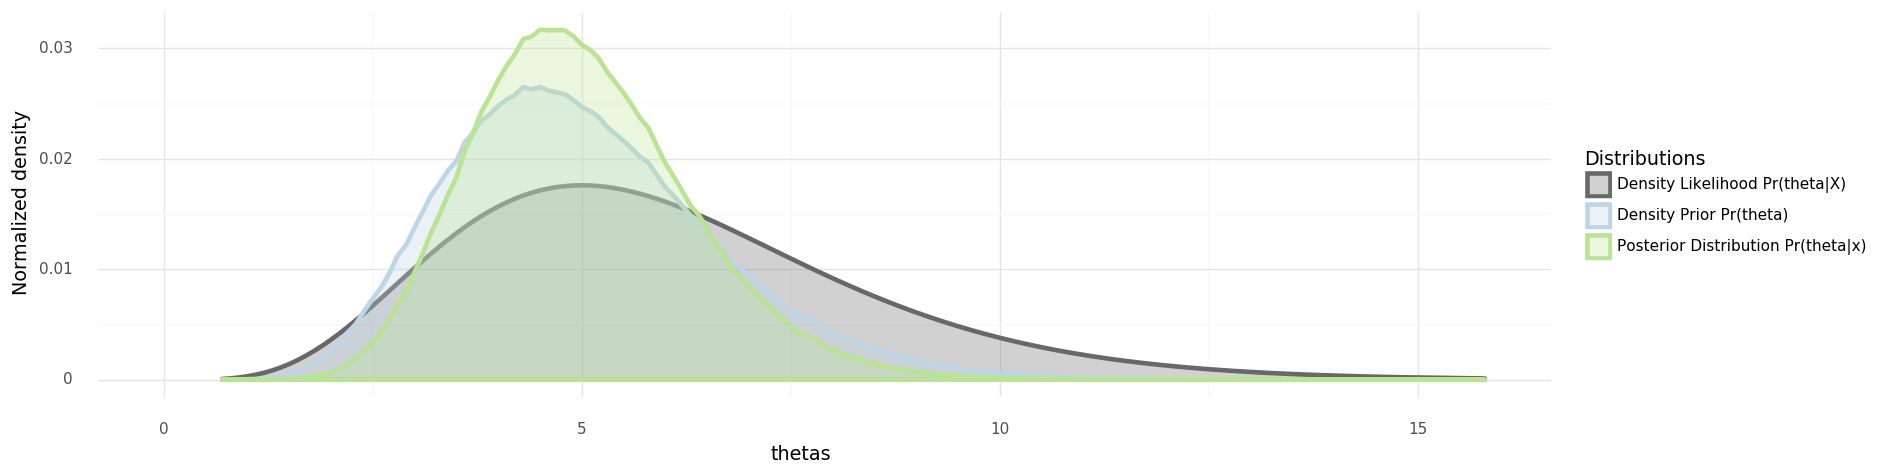

<ggplot: (-9223372036523133380)>

In [5]:
# Gamma prior
generate_posterior(gamma_prior, [10,2],
                   likelihood_poisson, [5],
                   precision = 1,
                   n_samples = 500000)

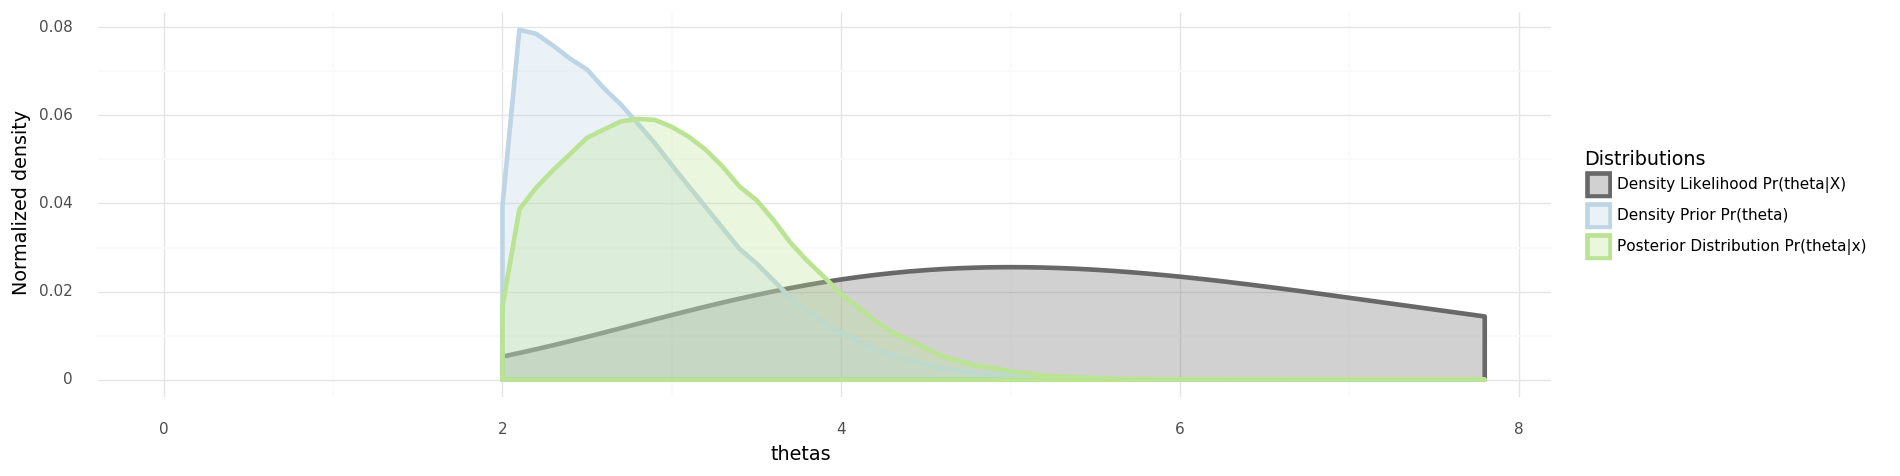

<ggplot: (333863502)>

In [6]:
# Half Normal prior
generate_posterior(half_norm_prior, [2,1],
                   likelihood_poisson, [5],
                   precision = 1,
                   n_samples = 500000)

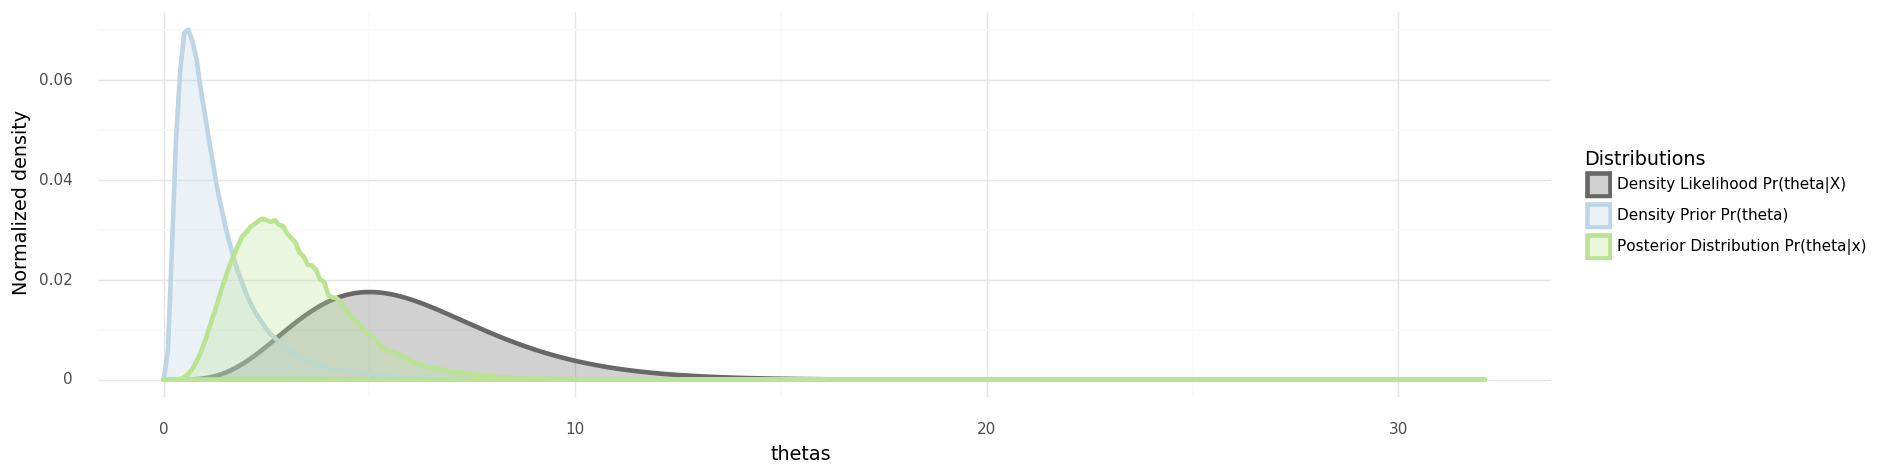

<ggplot: (-9223372036520903308)>

In [7]:
# Generating from a lognormal distribution
generate_posterior(lognorm_prior, [0,0.75],
                   likelihood_poisson, [5],
                   precision = 1,
                   n_samples = 500000)

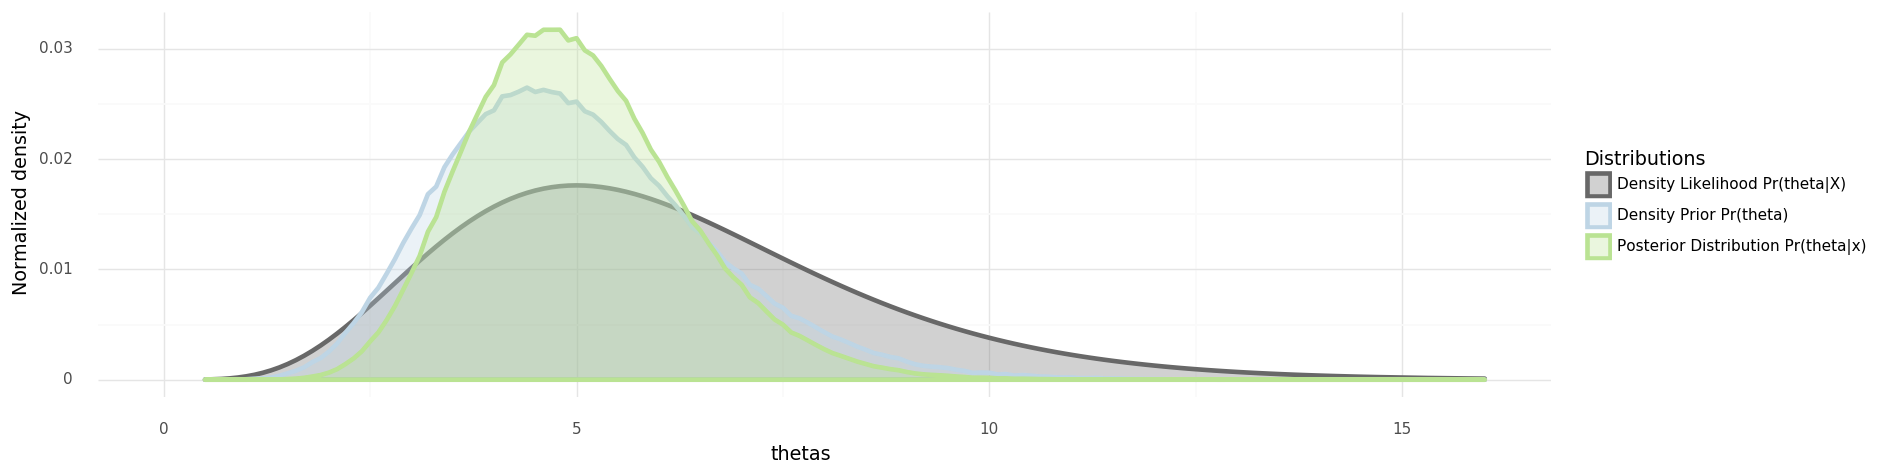

<ggplot: (333821423)>

In [8]:
###############################
### Misspecifying the prior ###
###############################
# Initial sample
alpha_1 = 10; beta = 2; X = 5
generate_posterior(gamma_prior, [alpha_1,beta],
                   likelihood_poisson, [X],
                   precision = 1,
                   n_samples = 500000)

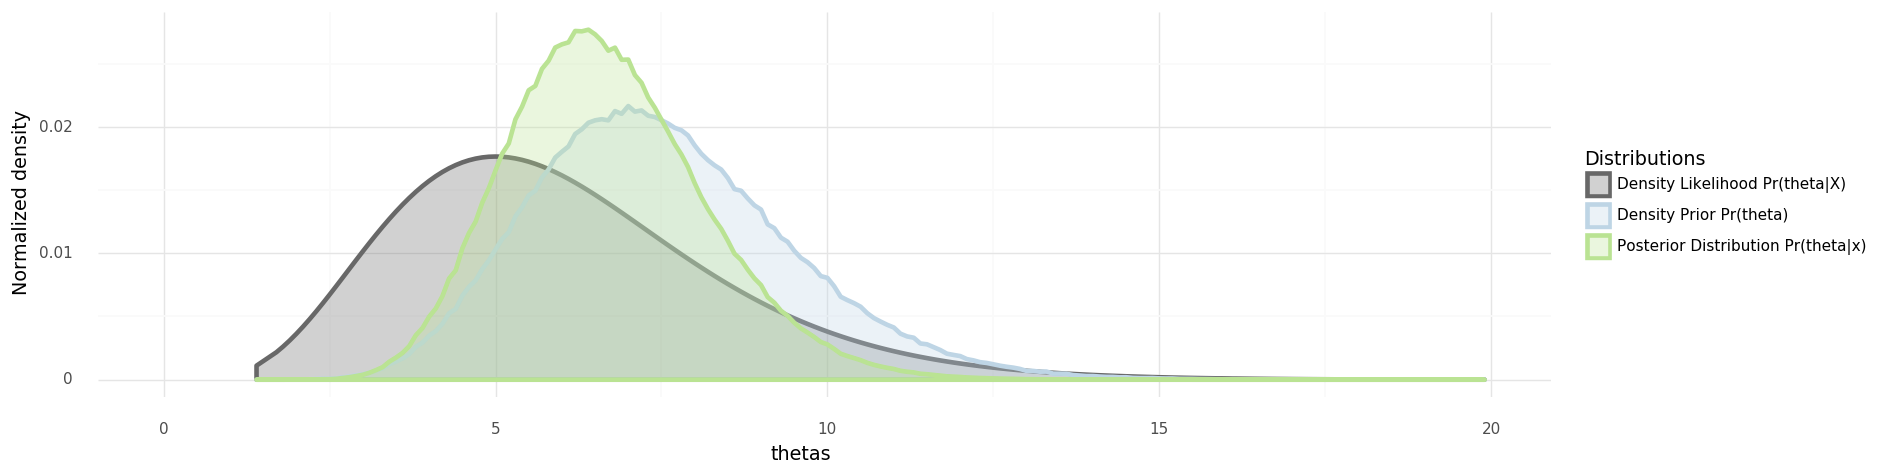

<ggplot: (-9223372036520852448)>

In [9]:
# Mis-specified 
alpha_2 = 15; beta = 2; X = 5
generate_posterior(gamma_prior, [alpha_2,beta],
                   likelihood_poisson, [X],
                   precision = 1,
                   n_samples = 500000)